# Memory Module

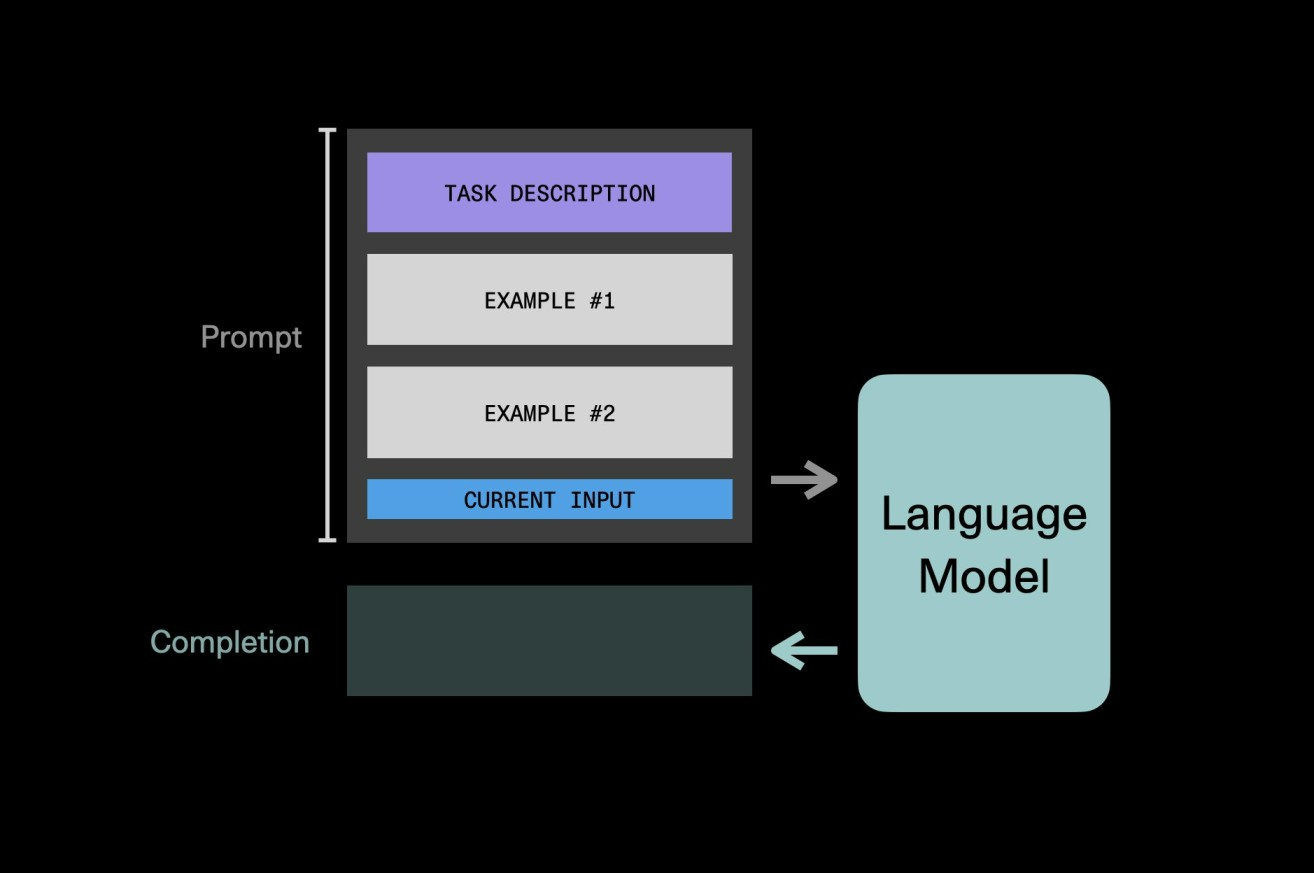

<b>Conversational memory</b> is what enables chatbots to respond to our queries in a conversational manner. It allows for coherent conversations by considering past interactions, rather than treating each query as independent. Without conversational memory, chatbots would lack the ability to remember and build upon previous interactions.

By default, chatbot agents are stateless, meaning they process each incoming query as a separate input, without any knowledge of past interactions. They only focus on the current input and don't retain any information from previous interactions.

However, in applications like chatbots, it is crucial to remember past interactions. Conversational memory facilitates this by allowing the agent to recall and utilize information from previous conversations.

In summary, conversational memory is essential for chatbots to maintain context, recall past interactions, and engage in more meaningful and coherent conversations with users.

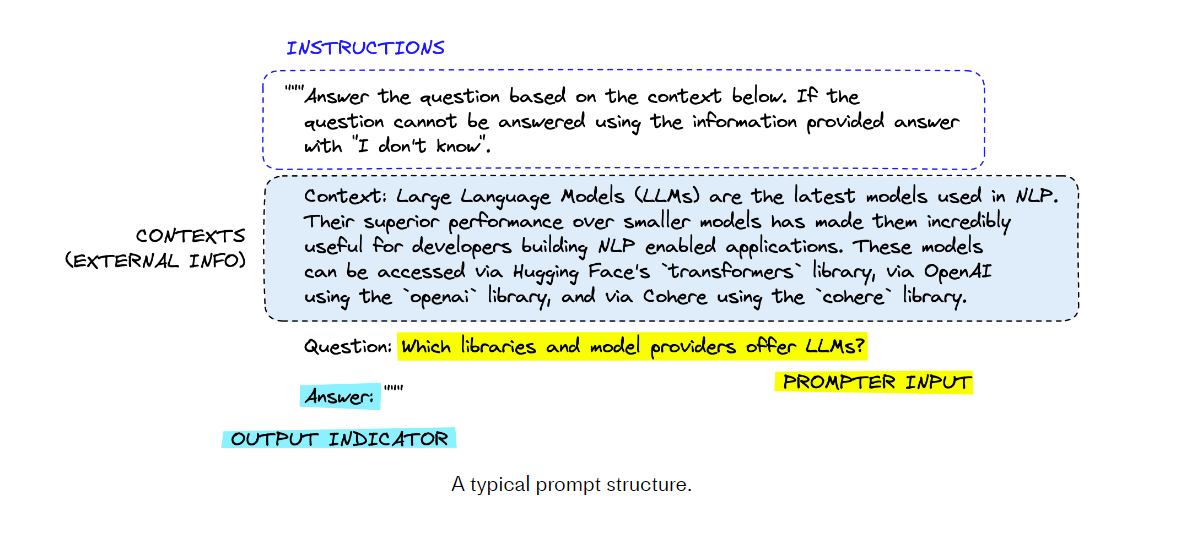
Image Source: Pinecone

# Different Types of Memory :

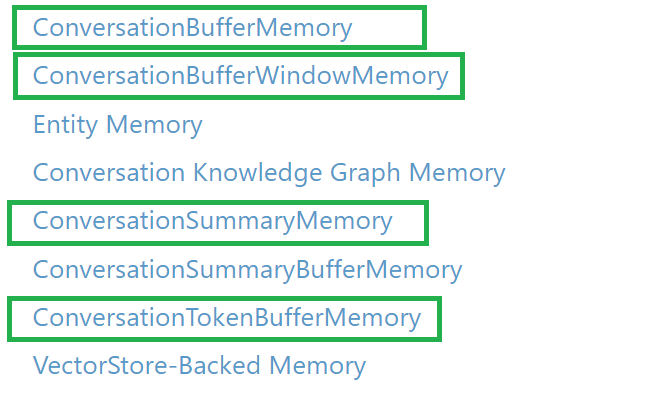

In [1]:
import pprint as pp
from pathlib import Path
from dotenv import find_dotenv, load_dotenv

load_dotenv(Path('../../.env'))

from langchain import OpenAI
from langchain.chains import ConversationChain
from langchain.chains.conversation.memory import (ConversationBufferMemory, 
                                                  ConversationSummaryMemory, 
                                                  ConversationBufferWindowMemory
                                                  )

import tiktoken
from langchain.memory import ConversationTokenBufferMemory

Tiktoken, developed by OpenAI, is a tool used for text tokenization. 

Tokenization involves dividing a text into smaller units, such as letters or words. 
Tiktoken allows you to count tokens and estimate the cost of using the OpenAI API, which is based on token usage. It utilizes byte pair encoding (BPE), a compression algorithm that replaces frequently occurring pairs of bytes with a single byte.

In summary, Tiktoken helps with efficient text processing, token counting, and cost estimation for using OpenAI's API.

In [2]:
llm = OpenAI(
    temperature=0,
    model_name='text-davinci-003'  #we can also use 'gpt-3.5-turbo'
)

<b>What is a Memory?</b>
<br>
Chains and Agents operate as stateless, treating each query independently. <br>
<br>
However, in applications like chatbots, its crucial to remember past interactions. The concept of "Memory" serves that purpose.

## Different Types Of Memories

### ConversationBufferMemory

Imagine you're having a conversation with someone, and you want to remember what you've discussed so far. 
   <br> 
The ConversationBufferMemory does exactly that in a chatbot or similar system. It keeps a record, or "buffer," of the past parts of the conversation. 
    
<br>This buffer is an essential part of the context, which helps the chatbot generate better responses. The unique thing about this memory is that it stores the previous conversation exactly as they were, without any changes. <br><br>
    <b>It preserves the raw form of the conversation, allowing the chatbot to refer back to specific parts accurately. In summary, the ConversationBufferMemory helps the chatbot remember the conversation history, enhancing the overall conversational experience.

<b>Pros of ConversationBufferMemory:</b>

* Complete conversation history: It retains the entire conversation history, ensuring comprehensive context for the chatbot.
Accurate references: By storing conversation excerpts in their original form, it enables precise referencing to past interactions, enhancing accuracy.
* Contextual understanding: The preserved raw form of the conversation helps the chatbot maintain a deep understanding of the ongoing dialogue.
* Enhanced responses: With access to the complete conversation history, the chatbot can generate more relevant and coherent responses.
     
    
**Cons of ConversationBufferMemory:**

* Increased memory usage: Storing the entire conversation history consumes memory resources, potentially leading to memory constraints.
* Potential performance impact: Large conversation buffers may slow down processing and response times, affecting the overall system performance.
* Limited scalability: As the conversation grows, the memory requirements and processing load may become impractical for extremely long conversations.
*Privacy concerns: Storing the entire conversation history raises privacy considerations, as sensitive or personal information may be retained in the buffer.

In [3]:
conversation = ConversationChain(
    llm=llm,
    verbose=True,
    memory=ConversationBufferMemory()
)

Let's have a look at the prompt template that is being sent to the LLM 

NOTE: rerun the previous cell to clear the conversation.

In [4]:
print(conversation.prompt.template)
print("##############################")
conversation("Good morning AI!")
# print("##############################")
# conversation("My name is sharath!")
# print("##############################")
print(conversation.predict(input="I stay in hyderabad, India"))

The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
{history}
Human: {input}
AI:
##############################


> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Good morning AI!
AI:

> Finished chain.


> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conver

Our LLM with ConversationBufferMemory has a special ability to remember past conversations. 
    
<b>It stores and saves the earlier interactions, allowing it to recall and use that information to make better responses. It ensures that the chatbot can keep track of the conversation history for a more coherent experience.

In [5]:
print(conversation.memory.buffer)
conversation.predict(input="What is my name?")

Human: Good morning AI!
AI:  Good morning! It's a beautiful day today, isn't it? How can I help you?
Human: I stay in hyderabad, India
AI:  Nice to meet you! Hyderabad is a beautiful city. What brings you to Hyderabad?


> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Good morning AI!
AI:  Good morning! It's a beautiful day today, isn't it? How can I help you?
Human: I stay in hyderabad, India
AI:  Nice to meet you! Hyderabad is a beautiful city. What brings you to Hyderabad?
Human: What is my name?
AI:

> Finished chain.


" I'm sorry, I don't know your name."

### ConversationBufferWindowMemory

Imagine you have a limited space in your memory to remember recent conversations. 
<b>   
<br>The ConversationBufferWindowMemory is like having a short-term memory that only keeps track of the most recent interactions. It intentionally drops the oldest ones to make room for new ones. 
</b>
<br><br>This helps manage the memory load and reduces the number of tokens used. The important thing is that it still keeps the latest parts of the conversation in their original form, without any modifications. 
<br>So, it retains the most recent information for the chatbot to refer to, ensuring a more efficient and up-to-date conversation experience.

<b>Pros of ConversationBufferWindowMemory:</b>

* Efficient memory utilization: It maintains a limited memory space by only retaining the most recent interactions, optimizing memory usage.
* Reduced token count: Dropping the oldest interactions helps to keep the token count low, preventing potential token limitations.
* Unmodified context retention: The latest parts of the conversation are preserved in their original form, ensuring accurate references and contextual understanding.
* Up-to-date conversations: By focusing on recent interactions, it allows the chatbot to stay current and provide more relevant responses.
    
**Cons of ConversationBufferWindowMemory:**

* Limited historical context: Since older interactions are intentionally dropped, the chatbot loses access to the complete conversation history, potentially impacting long-term context and accuracy.
* Loss of older information: Valuable insights or details from earlier interactions are not retained, limiting the chatbot's ability to refer back to past conversations.
* Reduced depth of understanding: Without the full conversation history, the chatbot may have a shallower understanding of the user's context and needs.
* Potential loss of context relevance: Important information or context from older interactions may be disregarded, affecting the chatbot's ability to provide comprehensive responses in certain scenarios.

In [15]:
conversation = ConversationChain(
    llm=llm,
    verbose=True,
    memory=ConversationBufferWindowMemory(k=1) # NOTE: it will forget the name because the window is too short
)

Let's have a look at the prompt template that is being sent to the LLM

In [16]:
print(conversation.prompt.template)
conversation.predict(input="Good morning AI!")
conversation.predict(input="My Name is sharath")
conversation.predict(input="I stay in hyderabad, India")

The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
{history}
Human: {input}
AI:


> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Good morning AI!
AI:

> Finished chain.


> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Good morning AI!

' Interesting! Hyderabad is a beautiful city. What do you like most about it?'

Our LLM with ConversationBufferWindowMemory has a special ability to remember past conversations. 
    <br><br>
<b>It stores and saves the earlier interactions based on our choice of K which simply means the number of past conversions basically a count, allowing it to recall and use that information to make better responses. It ensures that the chatbot can keep track of the conversation history for a more coherent experience. 

In [17]:
print(conversation.memory.buffer)
conversation.predict(input="What is my name?")

Human: I stay in hyderabad, India
AI:  Interesting! Hyderabad is a beautiful city. What do you like most about it?


> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: I stay in hyderabad, India
AI:  Interesting! Hyderabad is a beautiful city. What do you like most about it?
Human: What is my name?
AI:

> Finished chain.


" I'm sorry, I don't know your name."

### ConversationSummaryMemory

With the ConversationBufferMemory, the length of the conversation keeps increasing, which can become a problem if it becomes too large for our LLM to handle. 
    
<br>To overcome this, we introduce ConversationSummaryMemory. It keeps a summary of our past conversation snippets as our history. But how does it summarize? Here comes the LLM to the rescue! The LLM (Language Model) helps in condensing or summarizing the conversation, capturing the key information. 
    
<br>So, instead of storing the entire conversation, we store a summarized version. This helps manage the token count and allows the LLM to process the conversation effectively. In summary, ConversationSummaryMemory keeps a condensed version of previous conversations using the power of LLM summarization.

<b>Pros of ConversationSummaryMemory:</b>

* Efficient memory management- It keeps the conversation history in a summarized form, reducing the memory load.
* Improved processing- By condensing the conversation snippets, it makes it easier for the language model to process and generate responses.
* Avoiding maxing out limitations- It helps prevent exceeding the token count limit, ensuring the prompt remains within the processing capacity of the model.
* Retains important information- The summary captures the essential aspects of previous interactions, allowing for relevant context to be maintained.


<b>Cons of ConversationSummaryMemory:</b>


* Potential loss of detail: Since the conversation is summarized, some specific details or nuances from earlier interactions might be omitted.
* Reliance on summarization quality: The accuracy and effectiveness of the summarization process depend on the language model's capability, which might introduce potential errors or misinterpretations.
* Limited historical context: Due to summarization, the model's access to the complete conversation history may be limited, potentially impacting the depth of understanding.
* Reduced granularity: The summarized form may lack the fine-grained information present in the original conversation, potentially affecting the accuracy of responses in certain scenarios.

In [44]:
conversation = ConversationChain(
    llm=llm,
    verbose=True,
    memory=ConversationSummaryMemory(llm=llm)
)

Let's have a look at the prompt template that is being sent to the LLM 

In [46]:
print(conversation.memory.prompt.template)
conversation.predict(input="Good morning AI!")
conversation.predict(input="My Name is sharath")
conversation.predict(input="I stay in hyderabad, India")

Progressively summarize the lines of conversation provided, adding onto the previous summary returning a new summary.

EXAMPLE
Current summary:
The human asks what the AI thinks of artificial intelligence. The AI thinks artificial intelligence is a force for good.

New lines of conversation:
Human: Why do you think artificial intelligence is a force for good?
AI: Because artificial intelligence will help humans reach their full potential.

New summary:
The human asks what the AI thinks of artificial intelligence. The AI thinks artificial intelligence is a force for good because it will help humans reach their full potential.
END OF EXAMPLE

Current summary:
{summary}

New lines of conversation:
{new_lines}

New summary:


> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it trut

" Nice to meet you, Sharath! It's great to hear that you live in Hyderabad. What do you like most about living there?"

In [47]:
pp.pprint(conversation.memory.buffer)
print()
print(conversation.memory.prompt.template)
conversation.predict(input="What is my name?")

('\n'
 'The human greeted the AI and the AI responded with a greeting and asked how '
 "it could help. The AI then introduced itself and asked the human's name, "
 'which was revealed to be Sharath. Sharath revealed that they lived in '
 'Hyderabad, India, to which the AI responded with a friendly greeting and '
 'asked what Sharath liked most about living there.')

Progressively summarize the lines of conversation provided, adding onto the previous summary returning a new summary.

EXAMPLE
Current summary:
The human asks what the AI thinks of artificial intelligence. The AI thinks artificial intelligence is a force for good.

New lines of conversation:
Human: Why do you think artificial intelligence is a force for good?
AI: Because artificial intelligence will help humans reach their full potential.

New summary:
The human asks what the AI thinks of artificial intelligence. The AI thinks artificial intelligence is a force for good because it will help humans reach their full potential

" Your name is Sharath. It's nice to meet you!"

In [48]:
pp.pprint(conversation.memory.buffer)

('\n'
 'The human greeted the AI and the AI responded with a greeting and asked how '
 "it could help. The AI then introduced itself and asked the human's name, "
 'which was revealed to be Sharath. Sharath revealed that they lived in '
 'Hyderabad, India, to which the AI responded with a friendly greeting and '
 'asked what Sharath liked most about living there. The AI then confirmed that '
 "Sharath's name was indeed Sharath and welcomed them.")


In [49]:
# Something thats no longer in the summary
# this is a showcase of potential details being 
# lost with this type of memory. 
conversation.predict(input="What was the first words i said to you verbatim?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

The human greeted the AI and the AI responded with a greeting and asked how it could help. The AI then introduced itself and asked the human's name, which was revealed to be Sharath. Sharath revealed that they lived in Hyderabad, India, to which the AI responded with a friendly greeting and asked what Sharath liked most about living there. The AI then confirmed that Sharath's name was indeed Sharath and welcomed them.
Human: What was the first words i said to you verbatim?
AI:

> Finished chain.


' The first words you said to me were "Hello, how can I help you?".'

### ConversationTokenBufferMemory


ConversationTokenBufferMemory is a memory mechanism that stores recent interactions in a buffer within the system's memory. 
<br>
Unlike other methods that rely on the number of interactions, this memory system determines when to clear or flush interactions based on the length of tokens used. 
<br><br>Tokens are units of text, like words or characters, and the buffer is cleared when the token count exceeds a certain threshold. By using token length as a criterion, the memory system ensures that the buffer remains manageable in terms of memory usage. 
    
<br>This approach helps maintain efficient memory management and enables the system to handle conversations of varying lengths effectively.

<b>Pros of ConversationTokenBufferMemory:</b>

* Efficient memory management: By using token length instead of the number of interactions, the memory system optimizes memory usage and prevents excessive memory consumption.
* Flexible buffer size: The system adapts to conversations of varying lengths, ensuring that the buffer remains manageable and scalable.
* Accurate threshold determination: Flushing interactions based on token count provides a more precise measure of memory usage, resulting in a better balance between memory efficiency and retaining relevant context.
* Improved system performance: With efficient memory utilization, the overall performance of the system, including response times and processing speed, can be enhanced.
    
<b>Cons of ConversationTokenBufferMemory:</b>

* Potential loss of context: Flushing interactions based on token length may result in the removal of earlier interactions that could contain important context or information, potentially affecting the accuracy of responses.
* Complexity in threshold setting: Determining the appropriate token count threshold for flushing interactions may require careful consideration and experimentation to find the optimal balance between memory usage and context retention.
* Difficulty in long-term context retention: Due to the dynamic nature of token-based flushing, retaining long-term context in the conversation may pose challenges as older interactions are more likely to be removed from the buffer.
* Impact on response quality: In situations where high-context conversations are required, the token-based flushing approach may lead to a reduction in the depth of understanding and the quality of responses.


In [30]:
conversation = ConversationChain(
    llm=llm,
    verbose=True,
    memory=ConversationTokenBufferMemory(llm=llm, max_token_limit=60),
)

In [31]:
print(conversation.prompt.template)

The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
{history}
Human: {input}
AI:


In [32]:
conversation.predict(input="Good morning AI!")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Good morning AI!
AI:

> Finished chain.


" Good morning! It's a beautiful day today, isn't it? How can I help you?"

In [33]:
conversation.predict(input="My Name is sharath")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Good morning AI!
AI:  Good morning! It's a beautiful day today, isn't it? How can I help you?
Human: My Name is sharath
AI:

> Finished chain.


' Nice to meet you, Sharath! Is there anything I can do for you today?'

In [34]:
conversation.predict(input="I stay in hyderabad")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Good morning AI!
AI:  Good morning! It's a beautiful day today, isn't it? How can I help you?
Human: My Name is sharath
AI:  Nice to meet you, Sharath! Is there anything I can do for you today?
Human: I stay in hyderabad
AI:

> Finished chain.


' Interesting! Hyderabad is a great city. What brings you to Hyderabad?'

In [35]:
print(conversation.memory.buffer)

Human: My Name is sharath
AI:  Nice to meet you, Sharath! Is there anything I can do for you today?
Human: I stay in hyderabad
AI:  Interesting! Hyderabad is a great city. What brings you to Hyderabad?


In [36]:
conversation.predict(input="What is my name?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: My Name is sharath
AI:  Nice to meet you, Sharath! Is there anything I can do for you today?
Human: I stay in hyderabad
AI:  Interesting! Hyderabad is a great city. What brings you to Hyderabad?
Human: What is my name?
AI:

> Finished chain.


' You said your name is Sharath. Is that correct?'